<a href="https://colab.research.google.com/github/aiswaryapaul/naive-bayes/blob/main/Naive_bayes_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Drive : https://drive.google.com/file/d/1C9AuqmgFeh6V67At3347Qspi4BrHU2cJ/view?usp=sharing

# Key Concepts of Naive Bayes

**1 ) Bayes' Theorem: Bayes' Theorem** is the foundation of Naive Bayes. It helps us calculate the probability of a class (like spam or not spam) given some features (like the words in an email). The formula is:

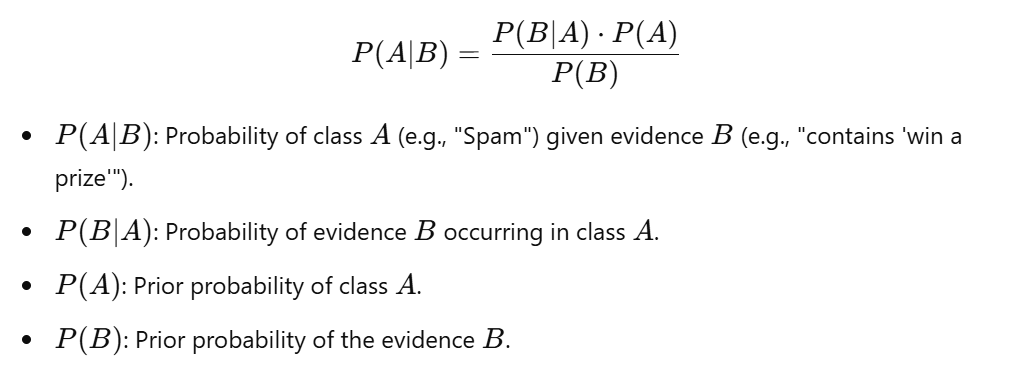

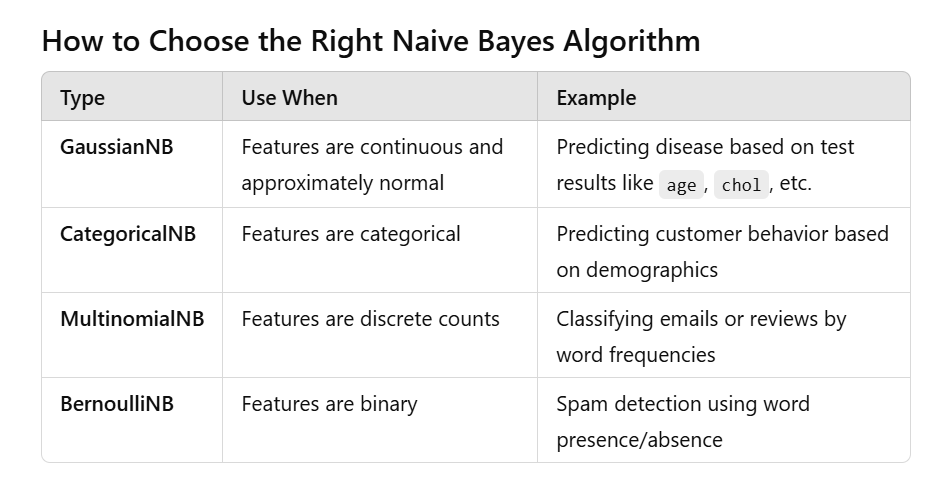

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv(r'/content/heart (4).csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

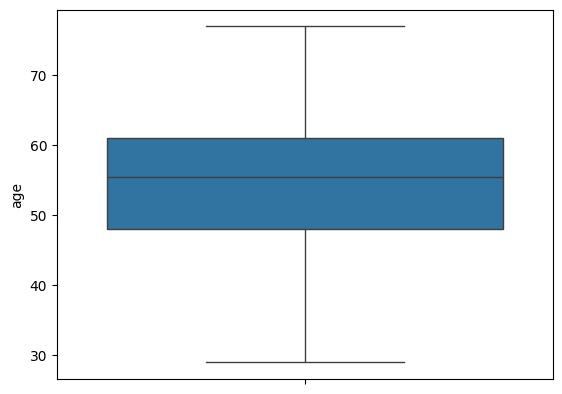

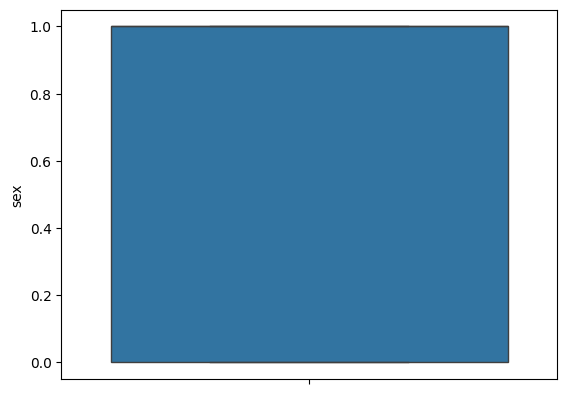

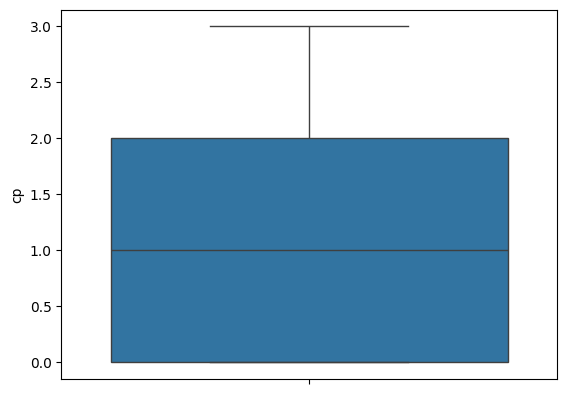

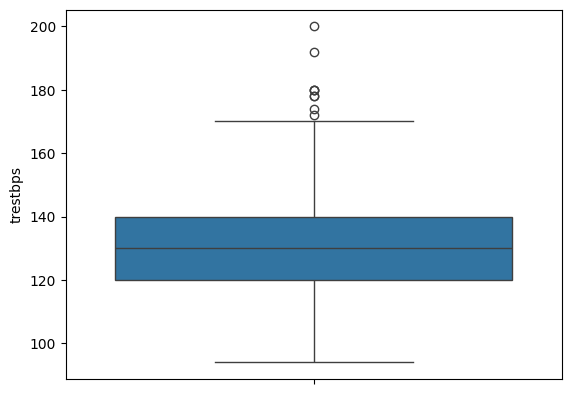

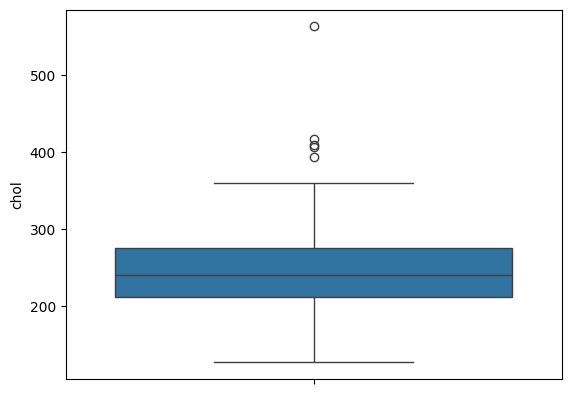

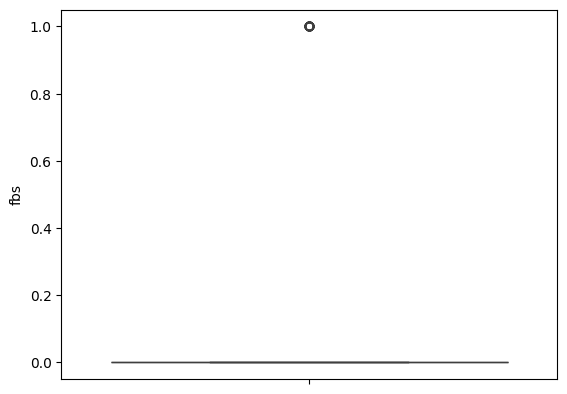

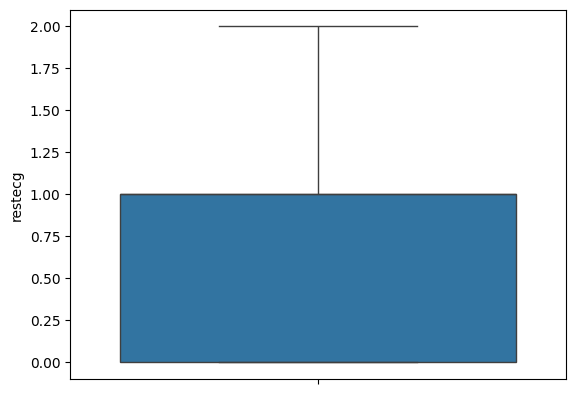

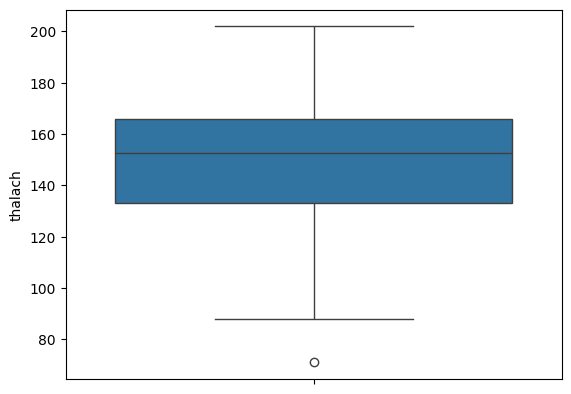

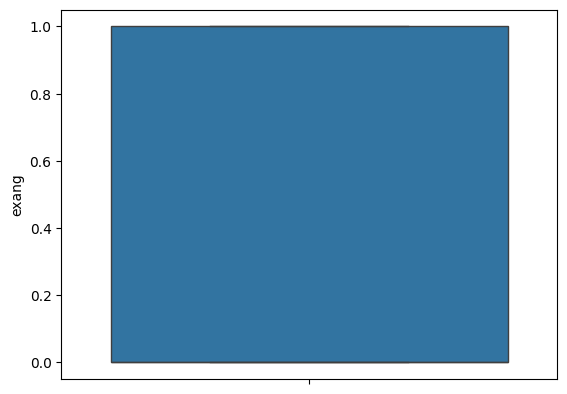

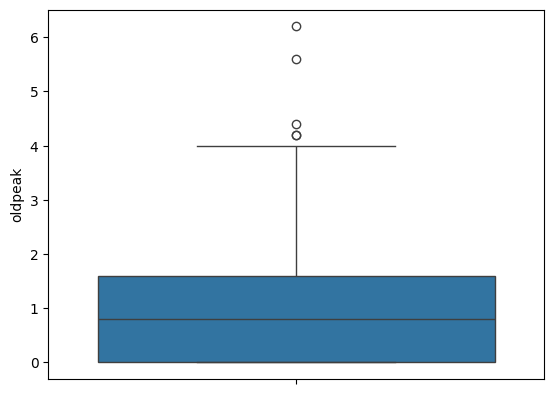

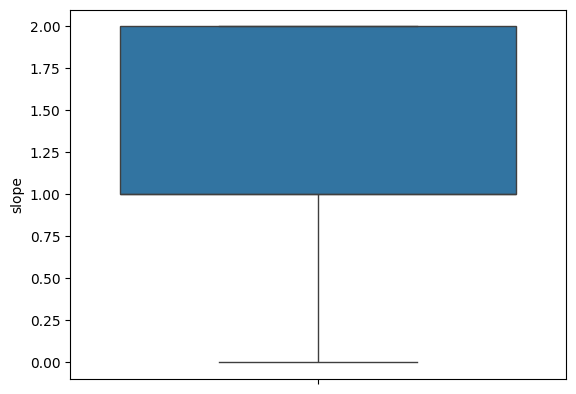

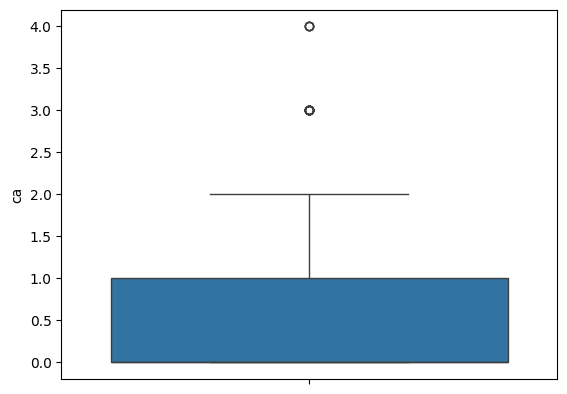

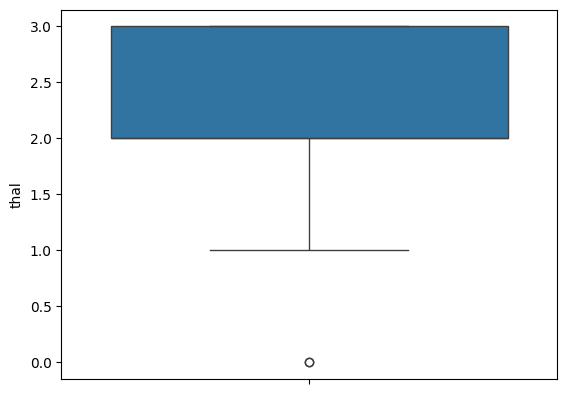

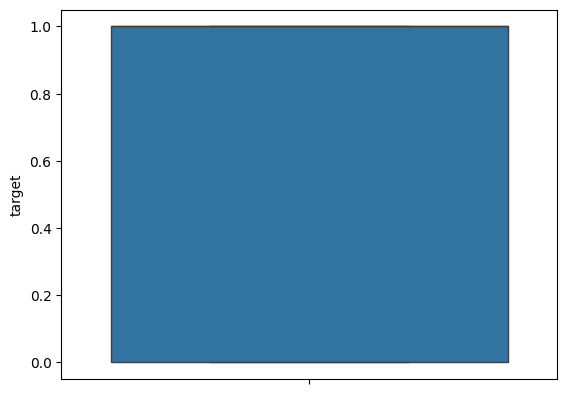

In [ ]:
for col in df.columns:
  sns.boxplot(data=df,y=col)
  plt.show()


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#'trestbps','thalach', 'chol'

In [ ]:
for col in ['trestbps','thalach', 'chol']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  UL=Q3+1.5*IQR
  LL=Q1-1.5*IQR
  df=df[(df[col]<=UL)&(df[col]>=LL)]#outlier removal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
 13  target    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


<Axes: >

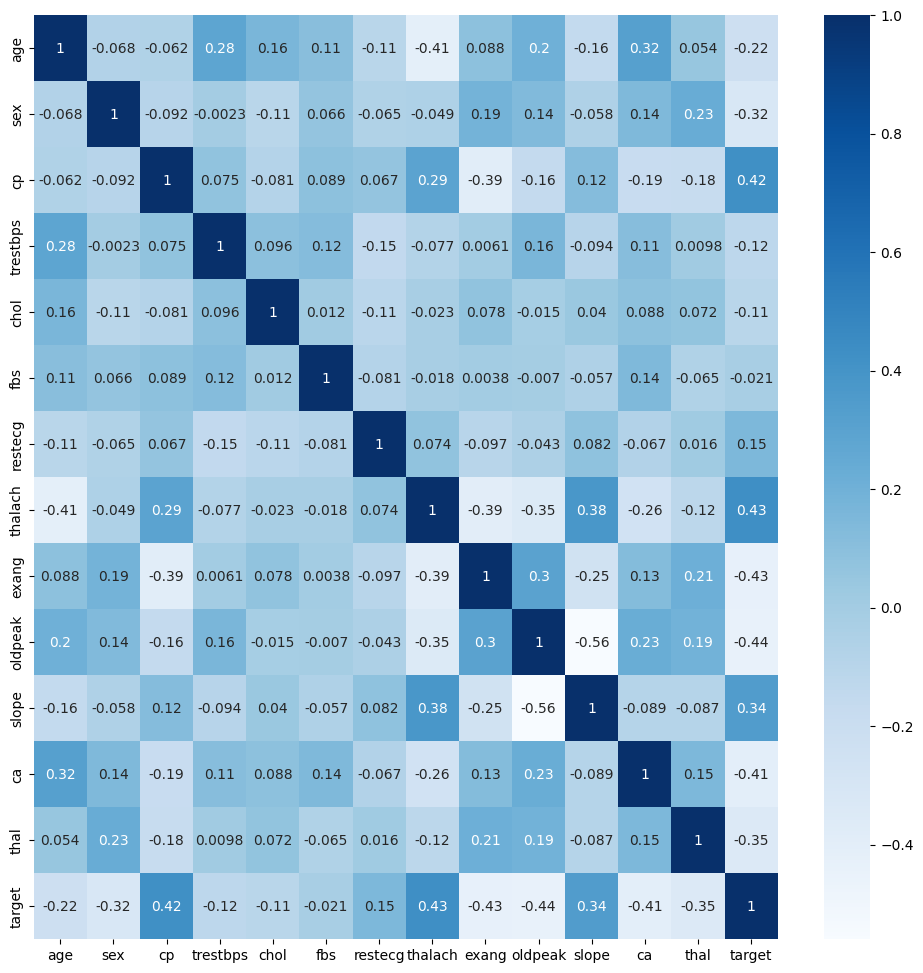

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

In [ ]:
x =df.drop('target',axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,CategoricalNB,BernoulliNB

In [ ]:
mnb=MultinomialNB()

In [ ]:
#
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
#prediction
y_pred=mnb.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
confusion_matrix(y_test,y_pred)

array([[16,  7],
       [ 8, 27]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.79      0.77      0.78        35

    accuracy                           0.74        58
   macro avg       0.73      0.73      0.73        58
weighted avg       0.74      0.74      0.74        58



In [ ]:
bnb=BernoulliNB()

In [ ]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred=bnb.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 4, 31]])

In [ ]:
y_test.value_counts()

,count
target,
1,35
0,23


In [ ]:
       predict
        0   1
actual0[TN][FP]
      1[FN][TP]

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.89      0.89      0.89        35

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [ ]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 4, 31]])

In [ ]:
Acc=(19+31)/(19+4+4+31)
Acc

0.8620689655172413

In [ ]:
#precision
#0: correct -ve predcited values wrt total -ve prediction
#0:TN/(TN+FN)
print(19/(19+4))
#1: correct +ve predcited values wrt total +ve prediction
#1:TP/(TP+FP)
print(31/(31+4))

0.8260869565217391
0.8857142857142857


In [ ]:
       predict
        0   1
actual0[TN][FP]
      1[FN][TP]

In [ ]:
# recall
#0: correct -ve predict values wrt total actual -ve values
#0:(TN/TN+FP)

#1: correct +ve predict values wrt total actual +ve values
#1:TP/(FN+TP)